# Lecture 18: Comparing runs scored at Coors Field to other parks
***

We have read that offense is inflated at Coors Field compared to the rest of the major league parks. For your next assignment, you are comparing offensive production of Rockies players at Coors to the performance of other players. Today, we're going examine how we might start to talk about comparing different data sets to determine if there is a difference.

I pulled the data for runs scored in all games at all parks in Retrosheet. We can see both home and away data and the final total runs scored for both teams.

In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from scipy.stats import ttest_ind

local_path = 'runsForLeagueAndCoorsField2.csv'

# Select the path that works for you 
file_path = local_path 

# Load the data into a DataFrame 
dfTW= pd.read_csv(file_path)

# Inspect some of the data
dfTW.head()

,game_id,year_id,game_dt,homeTeam,awayTeam,ballpark,awayScore,homeScore,totalRuns
0,ANA200004030,2000,403,ANA,NYA,ANA01,3,2,5
1,ANA200004040,2000,404,ANA,NYA,ANA01,5,3,8
2,ANA200004050,2000,405,ANA,NYA,ANA01,6,12,18
3,ANA200004070,2000,407,ANA,BOS,ANA01,3,7,10
4,ANA200004080,2000,408,ANA,BOS,ANA01,5,7,12


The data has columns for: 

- **gameID**: Retrosheet game identifier 
- **yearID**: Year 
- **game_dt**: Year, month, day the game was played
- **homeTeam**: Home team ID
- **awayTeam**: Away team ID
- **ballpark**: Ballpark ID where game was played
- **awayScore**: Runs scored by away team
- **homeScore**: Runs score by home team
- **totalRuns**: Total runs scored in the game

### Exercise 1
***
Generate a histogram of the totalRuns scored for all games for the entire league and for games played at Coors Field. What can you say about the skewness, means, std, outliers? Include a qualitative explanation as well.

Comments go here:


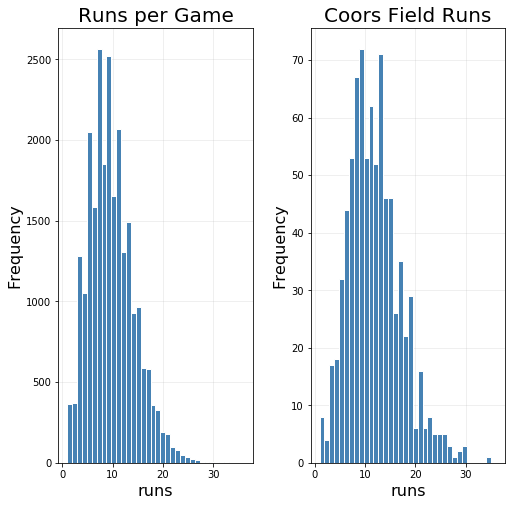

In [30]:
# Initialize figure subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,8))

# --------------------------------------
# Plot histogram total runs distribution 
# --------------------------------------
dfTW.hist(column="totalRuns", ax=ax[0], facecolor="steelblue", edgecolor="white", bins=36, range=[1,36])
                                                      
# Add titles and labels 
ax[0].set_title("Runs per Game", fontsize=20)
ax[0].set_xlabel("runs", fontsize=16)
ax[0].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
ax[0].grid(alpha=0.25)
ax[0].set_axisbelow(True)

dfCoors = dfTW.loc[dfTW["homeTeam"] == "COL"].copy()

dfCoors.hist(column = "totalRuns", ax=ax[1], facecolor="steelblue", edgecolor="white", bins=36, range=[1,36])
                                                      
# Add titles and labels 
ax[1].set_title("Coors Field Runs", fontsize=20)
ax[1].set_xlabel("runs", fontsize=16)
ax[1].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
ax[1].grid(alpha=0.25)
ax[1].set_axisbelow(True)



In [28]:
print (dfCoors['totalRuns'].describe())

count    818.000000
mean      11.745721
std        5.339297
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       35.000000
Name: totalRuns, dtype: float64


In [29]:
print (dfTW['totalRuns'].describe())

count    24613.000000
mean         9.506115
std          4.633953
min          1.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         36.000000
Name: totalRuns, dtype: float64


## Hypothesis testing
***

If we want to say that there is a statistically significant difference between the run distribution at Coors Field compared to the run distribution for all ballparks, we first need to generate a hypothesis. 

In any hypothesis testing problems, we have two hypothesis options:
 - $h_0$ - the null hypothesis
 - $h_1$ - an alternate hypothesis
 
The objective of hypothesis testing is to determine if the alternate hypothesis is supported by the provided data. The initially favored claim $h_0$ will not be rejected in favor of the alternate hypothesis $h_1$ unless the data provides sufficient support for $h_1$. 

**The possible outcomes are**
- Reject $h_0$ in favor of $h_1$
- Fail to reject $h_0$

### T-test

One of the simplest tests we can do to compare out data is a t-test. We have two options: 

- A One Sample T-Test and a Two-sample T-Test. 

- We use a One Sample T-Test to evaluate the null hypothesis that the mean of a 1D sample dataset of independant observations is equal to the true mean of the population from which the data is sampled. 

- We use a Two Sample T-Test to evaluate the null hypothesis that the means from two independently sampled datasets (with equal variance) are equal, meaning that the data was sampled from the same population.

### T-test output
- The t-test will output a ratio of the intergroup difference and the intragroup difference - the difference between the two groups and the difference within the groups. 
- The larger the t value, the more difference there is between the data groups. 
- The smaller the t value, the more similarity there is between groups. 
- For example, a t value of 3 means that the groups are three times as different from each other as they are within the individual group.

**Summary**
- A large t-score tells you that the groups are different.
- A small t-score tells you that the groups are similar.

### P-value
The t-test also produces a p-value.
- p-value is the probability of finding the observed results when the null hypothesis ($H_0$) is true. 
- You can also think of a p-value as the probability that variations in your sample data occurred by chance. 
- Low p-values indicate your data did not occur by chance. 
- For example, a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean that differences in the data are valid, and the null hypothesis that the populations are the same can be rejected.

### Null hypothesis
We're comparing run production at Coors Field and the rest of the league. We can formulate our hypothesis by comparing mean run production at Coors Field and the league overall.
- $h_0$ is $\mu_{coors} = \mu_{league}$

### Alternate hypothesis
Our alternate hypothesis is that the mean run production at Coors Field is greater than the mean run production for the league.
- $h_1$ is $\mu_{coors} > \mu_{league}$

We could start by just calculating the means and see that the Coors mean is quite a bit higher. In the data, the mean is 10.97, compared to 8.57 for the league overall. But, we need to know if these differences are different enough to be meaningful.

- $h_0$ is $\mu_{coors} = \mu_{league} = 8.57$
- $h_1$ is $\mu_{coors} > 8.57$

**A t-test assumes that you have a normal distribution. You could get invalid results if you run a t-test on non-normal data**

### Exercise 2
***
Apply a two-sample t-test to the league and Coors Field data. What are the results? Does it matter if you change the equal_var parameter. See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html for information on how to run the t-test in python.


In [33]:
ttest_ind(dfTW.totalRuns, dfCoors.totalRuns)

Ttest_indResult(statistic=-13.52769338083422, pvalue=1.4949043824887598e-41)

## Distributions - characterizing the data


### Do both distributions look normal?
Before we continue with other statistical evaluations, let's pause to look at the data again. I plotted a normal curve over the data histograms, with the same mean and std for each data set, to show how the data compares to a normal distribution.

Where does it differ from normal?

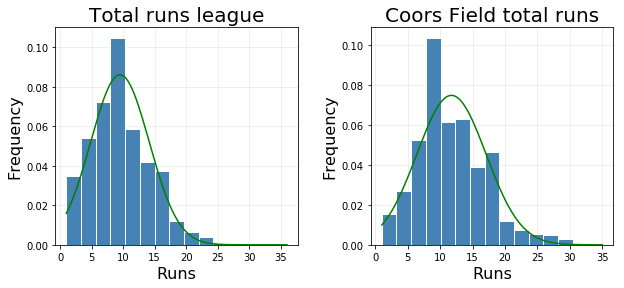

In [25]:
from scipy.stats import norm

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
dfTW.hist(column="totalRuns", bins = 15, ax=ax[0], facecolor="steelblue", normed=True, edgecolor="white")
#pd.Series(u).hist(ax=ax, bins=20, color="steelblue", normed=True, edgecolor="white")
ax[0].grid(alpha=0.25)
ax[0].set_axisbelow(True)
ax[0].set_title("Total runs league", fontsize=20)
ax[0].set_xlabel("Runs", fontsize=16)
ax[0].set_ylabel("Frequency", fontsize=16)

#plt.xticks(range(-10,10+1));
#ax.set_xlim([-10,10])
#ax.set_ylim([0,.5])
minRuns = dfTW["totalRuns"].min()
maxRuns = dfTW["totalRuns"].max()
x = np.linspace(minRuns,maxRuns,500)
mean = dfTW["totalRuns"].mean()
std = dfTW["totalRuns"].std()

f = norm.pdf(x, mean, std)
ax[0].plot(x,f,color="green");

dfCoors = dfTW.loc[dfTW["homeTeam"] == "COL"].copy()

dfCoors.hist(column = "totalRuns", bins = 15, ax=ax[1], normed = True, facecolor="steelblue", edgecolor="white")
                                                      
# Add titles and labels 
ax[1].set_title("Coors Field total runs", fontsize=20)
ax[1].set_xlabel("Runs", fontsize=16)
ax[1].set_ylabel("Frequency", fontsize=16)
minRuns = dfCoors["totalRuns"].min()
maxRuns = dfCoors["totalRuns"].max()
x = np.linspace(minRuns,maxRuns,500)
mean = dfCoors["totalRuns"].mean()
std = dfCoors["totalRuns"].std()

f = norm.pdf(x, mean, std)
ax[1].plot(x,f,color="green");


# Make grid lighter and set behind data
ax[1].grid(alpha=0.25)
ax[1].set_axisbelow(True)


#Maybe it's skew normal - skewnorm in scipy